In [57]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
import collections

# special matplotlib argument for improved plots
from matplotlib import rcParams
import seaborn as sns

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
len(train['Stock_ID'].unique())

1955

In [7]:
df_one = train[train['Stock_ID']==1]

In [11]:
len(df_one['timestamp'].unique())

380

In [15]:
df_one['Outcome'].value_counts()

0    194
1    186
Name: Outcome, dtype: int64

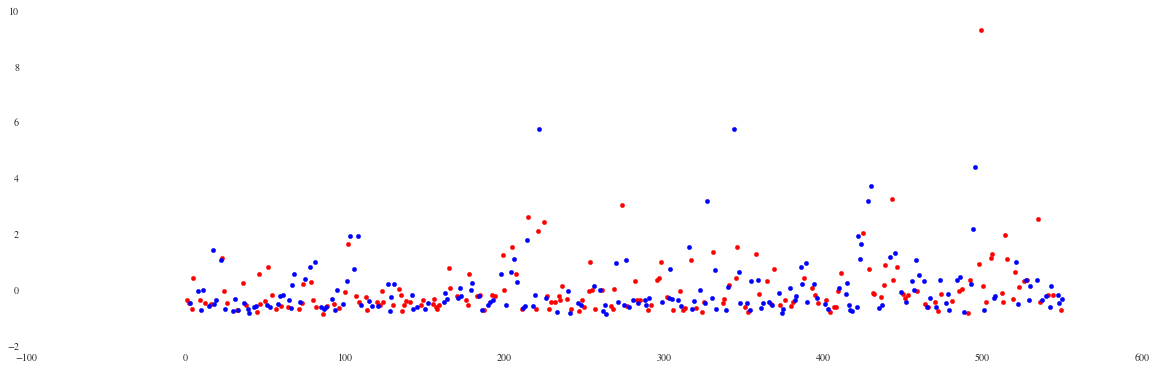

In [22]:
plt.scatter(df_one['timestamp'][df_one['Outcome']==1], df_one['Volume'][df_one['Outcome']==1], color = 'red')
plt.scatter(df_one['timestamp'][df_one['Outcome']==0], df_one['Volume'][df_one['Outcome']==0], color = 'blue')

In [31]:
t = train.groupby('timestamp')['Outcome'].count()
t = t.reset_index()
t.head()

,timestamp,Outcome
0,1,1730
1,2,1731
2,3,1733
3,4,1735
4,5,1733


In [35]:
p = train.groupby('timestamp')['Outcome'].sum()
p = p.reset_index()
p.head()
p.columns = ['timestamp','Pos']

In [38]:
q = pd.merge(t, p)
q['comp'] = q['Pos']/q['Outcome']

(array([ 10.,  21.,  52.,  71.,  75.,  83.,  58.,  19.,   0.,   5.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

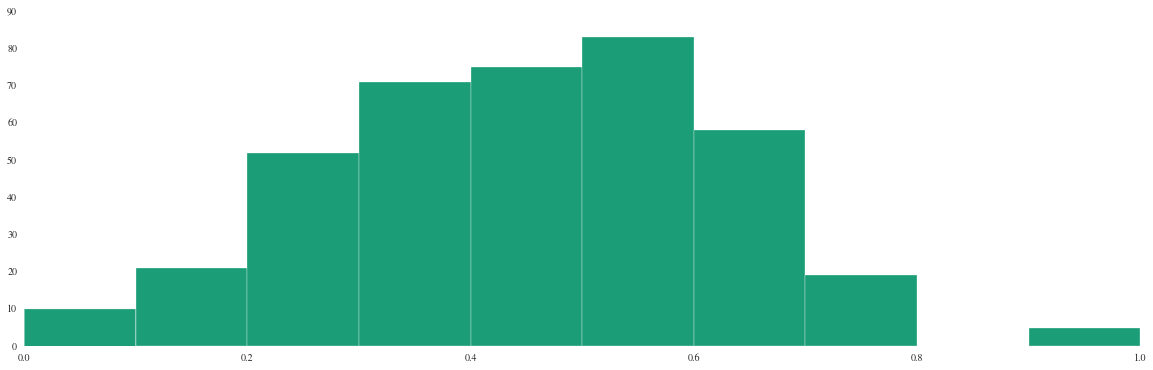

In [40]:
plt.hist(q['comp'])

In [43]:
train.corr()

,timestamp,Stock_ID,Volume,Three_Day_Moving_Average,Five_Day_Moving_Average,Ten_Day_Moving_Average,Twenty_Day_Moving_Average,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
timestamp,1.000000,-0.001470,0.037824,-0.095963,-0.095930,-0.092109,-0.086645,0.052534,0.094370,-0.002628,0.009371,-0.027462
Stock_ID,-0.001470,1.000000,-0.004704,0.013017,0.013095,0.013245,0.013440,-0.003986,-0.005124,-0.001613,-0.001050,-0.005901
Volume,0.037824,-0.004704,1.000000,0.022892,0.023028,0.023870,0.025861,0.440236,0.265164,0.250919,0.025796,0.017511
Three_Day_Moving_Average,-0.095963,0.013017,0.022892,1.000000,0.999307,0.993794,0.984522,0.190305,0.286264,0.029215,0.071669,-0.044765
Five_Day_Moving_Average,-0.095930,0.013095,0.023028,0.999307,1.000000,0.995992,0.987153,0.190002,0.287212,0.036707,0.068913,-0.045680
Ten_Day_Moving_Average,-0.092109,0.013245,0.023870,0.993794,0.995992,1.000000,0.995738,0.191272,0.291789,0.025030,0.053108,-0.044202
Twenty_Day_Moving_Average,-0.086645,0.013440,0.025861,0.984522,0.987153,0.995738,1.000000,0.193203,0.298071,0.022467,0.050051,-0.043008
True_Range,0.052534,-0.003986,0.440236,0.190305,0.190002,0.191272,0.193203,1.000000,0.552022,0.500400,0.009134,0.008678
Average_True_Range,0.094370,-0.005124,0.265164,0.286264,0.287212,0.291789,0.298071,0.552022,1.000000,0.135980,0.246295,0.017291
Positive_Directional_Movement,-0.002628,-0.001613,0.250919,0.029215,0.036707,0.025030,0.022467,0.500400,0.135980,1.000000,-0.153395,-0.011279


In [45]:
train.isnull().sum()

ID                                  0
timestamp                           0
Stock_ID                            0
Volume                              0
Three_Day_Moving_Average          448
Five_Day_Moving_Average           902
Ten_Day_Moving_Average           2047
Twenty_Day_Moving_Average        4404
True_Range                          0
Average_True_Range               2985
Positive_Directional_Movement     224
Negative_Directional_Movement     224
Outcome                             0
dtype: int64

In [48]:
# for col in    
#     plt.scatter(df_one['timestamp'][df_one['Outcome']==1], df_one['Volume'][df_one['Outcome']==1], color = 'red')
#     plt.scatter(df_one['timestamp'][df_one['Outcome']==0], df_one['Volume'][df_one['Outcome']==0], color = 'blue')
#     plt.show()

In [49]:
train.columns

Index([u'ID', u'timestamp', u'Stock_ID', u'Volume',
       u'Three_Day_Moving_Average', u'Five_Day_Moving_Average',
       u'Ten_Day_Moving_Average', u'Twenty_Day_Moving_Average', u'True_Range',
       u'Average_True_Range', u'Positive_Directional_Movement',
       u'Negative_Directional_Movement', u'Outcome'],
      dtype='object')

In [52]:
df = train.fillna(0)

In [50]:
ccc = [u'Volume',
       u'Three_Day_Moving_Average', u'Five_Day_Moving_Average',
       u'Ten_Day_Moving_Average', u'Twenty_Day_Moving_Average', u'True_Range',
       u'Average_True_Range', u'Positive_Directional_Movement',
       u'Negative_Directional_Movement']

Volume


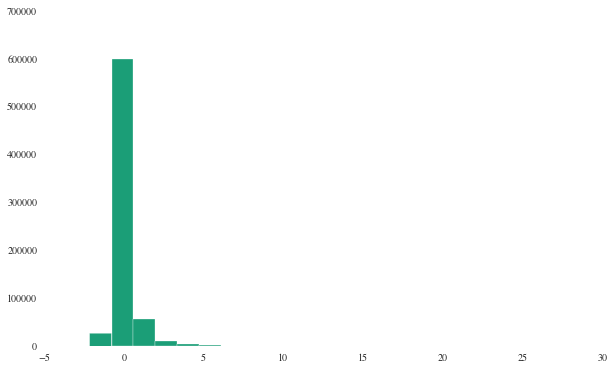

Three_Day_Moving_Average


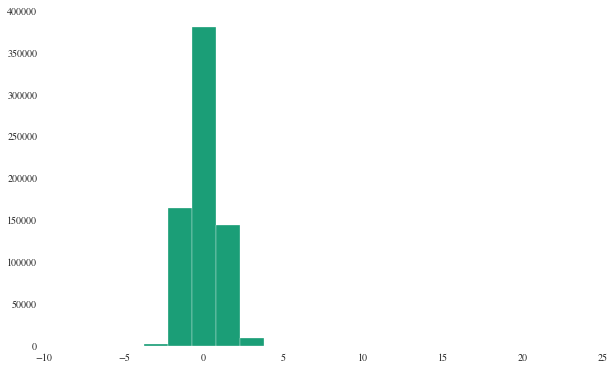

Five_Day_Moving_Average


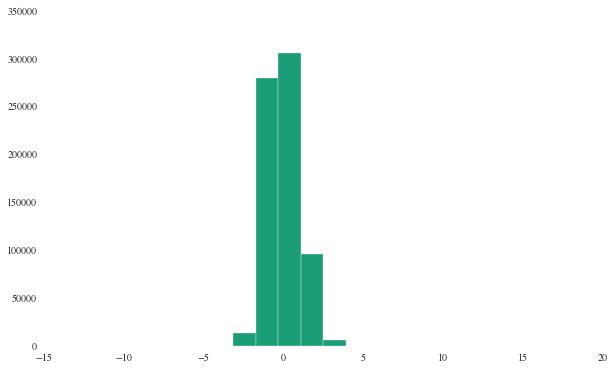

Ten_Day_Moving_Average


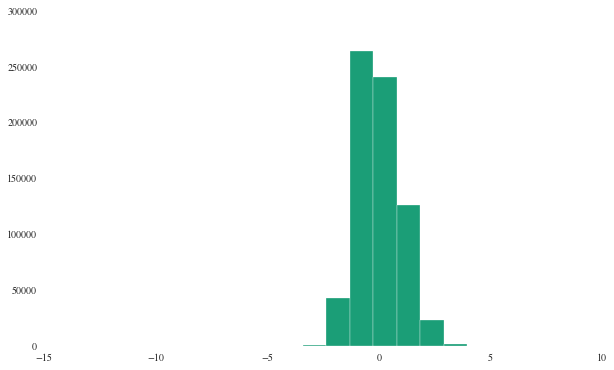

Twenty_Day_Moving_Average


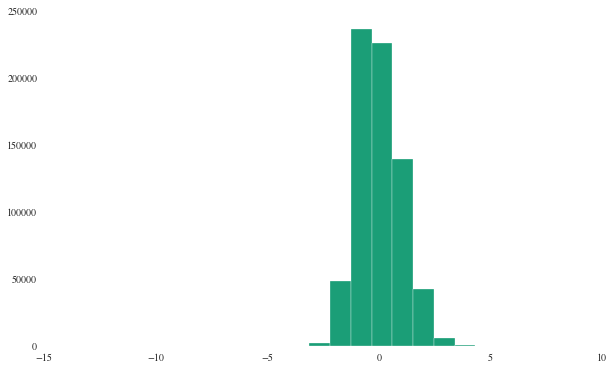

True_Range


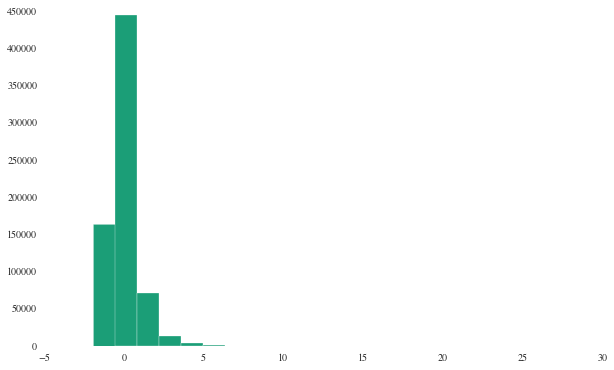

Average_True_Range


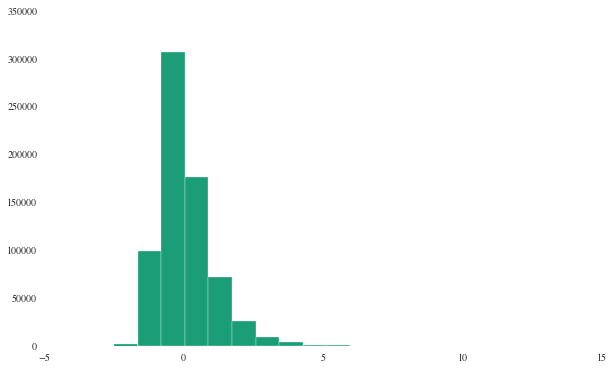

Positive_Directional_Movement


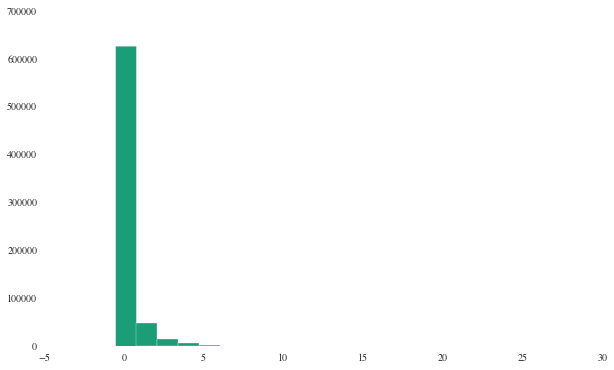

Negative_Directional_Movement


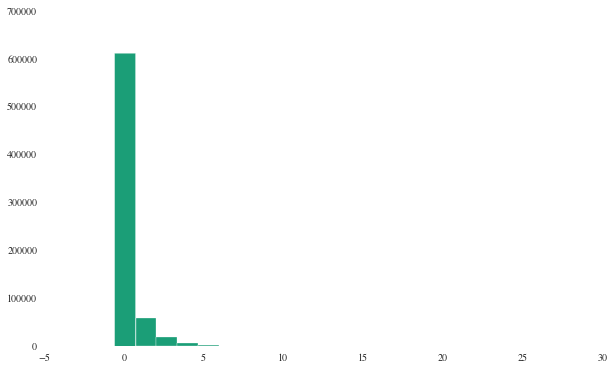

In [58]:
for c in ccc:
    print c
    plt.hist(df[c], bins = 20)
    plt.show()

In [59]:
train.describe()

,timestamp,Stock_ID,Volume,Three_Day_Moving_Average,Five_Day_Moving_Average,Ten_Day_Moving_Average,Twenty_Day_Moving_Average,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
count,702739.000000,702739.000000,702739.000000,702291.000000,701837.000000,700692.000000,698335.00000,702739.000000,699754.000000,702515.000000,702515.000000,702739.000000
mean,280.503639,1104.971428,-0.018538,0.002605,0.002763,0.005346,0.00891,0.049349,0.073381,-0.001103,0.002145,0.452918
std,158.802106,632.622214,0.963981,0.970311,0.969939,0.968780,0.96708,1.024621,1.011922,1.000778,1.019128,0.497779
min,1.000000,1.000000,-2.152350,-9.775470,-13.010450,-11.856340,-12.42192,-1.913410,-2.499660,-0.519270,-0.583160,0.000000
25%,142.000000,563.000000,-0.404945,-0.704275,-0.704790,-0.702830,-0.70005,-0.516390,-0.589960,-0.406840,-0.453440,0.000000
50%,284.000000,1112.000000,-0.203920,-0.119060,-0.119480,-0.116525,-0.11197,-0.179400,-0.137990,-0.345250,-0.395580,0.000000
75%,418.000000,1645.000000,0.053670,0.662700,0.664400,0.668310,0.67294,0.335870,0.520670,-0.129950,-0.054960,1.000000
max,550.000000,2199.000000,25.343090,20.376870,15.188170,9.220410,6.18142,25.509230,14.415600,25.561810,25.652140,1.000000


In [61]:
train[train['timestamp']>500].shape

(64366, 13)

In [65]:
test['timestamp'].describe()

count    101946.000000
mean        751.429992
std         115.200817
min         554.000000
25%         645.000000
50%         750.000000
75%         841.000000
max         953.000000
Name: timestamp, dtype: float64

In [71]:
train[[u'True_Range',
       u'Average_True_Range', u'Positive_Directional_Movement',
       u'Negative_Directional_Movement','Outcome']][train['Outcome']==1]

,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
0,-0.21129,-0.38778,-0.39903,-0.14321,1
5,1.21998,1.02812,1.44735,-0.40430,1
10,0.04799,-0.89847,-0.28440,-0.45877,1
12,0.52863,0.64543,-0.35803,0.93344,1
19,-1.08168,-1.25696,-0.40038,1.35780,1
23,0.59782,0.77159,-0.39093,-0.44673,1
33,0.10356,-0.62248,-0.41564,-0.49751,1
34,-0.68067,-0.12647,-0.40795,-0.46800,1
35,-0.80576,-0.42678,-0.48145,-0.44777,1
36,-0.83520,-1.23542,-0.15714,-0.45376,1


True_Range


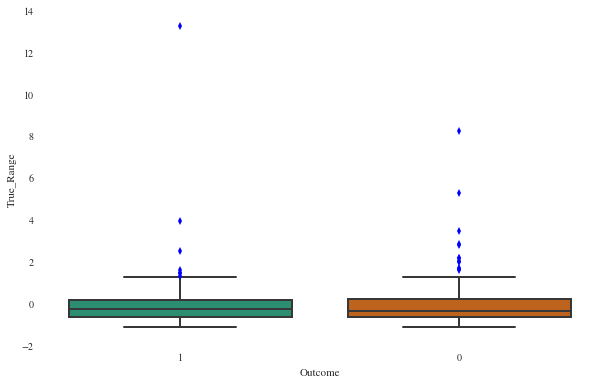

Average_True_Range


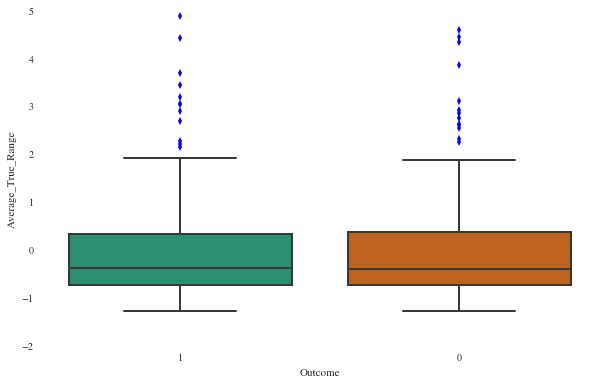

Positive_Directional_Movement


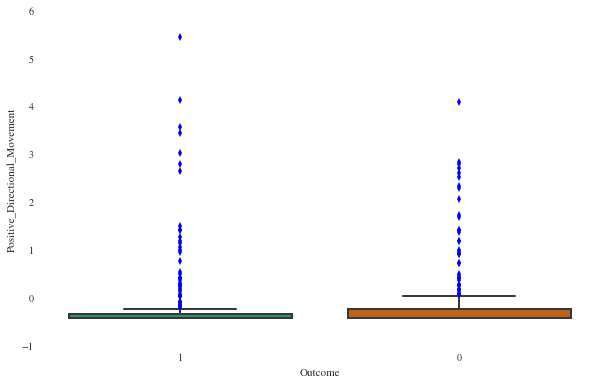

Negative_Directional_Movement


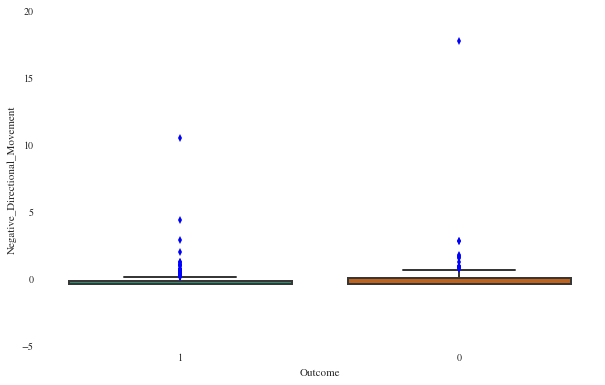

In [127]:
for c in [u'True_Range',
       u'Average_True_Range', u'Positive_Directional_Movement',
       u'Negative_Directional_Movement']:
    print c
    sns.boxplot(df_one['Outcome'], df_one[c])
    plt.show()

In [76]:
train.groupby('Outcome')['Positive_Directional_Movement'].mean()

Outcome
0    0.009168
1   -0.013508
Name: Positive_Directional_Movement, dtype: float64

Volume


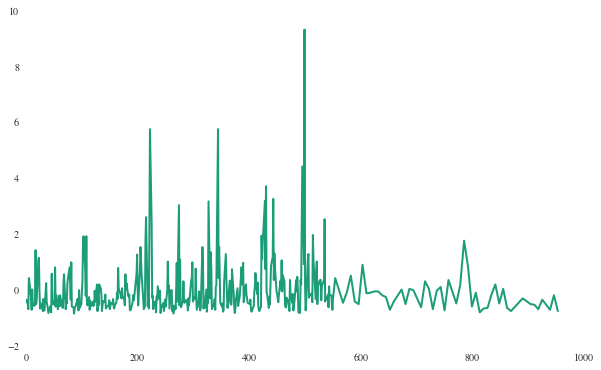

Three_Day_Moving_Average


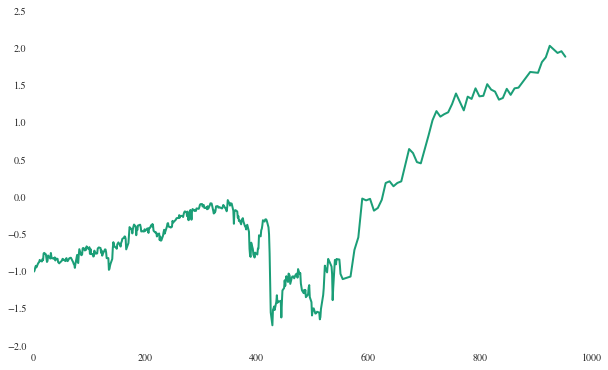

Five_Day_Moving_Average


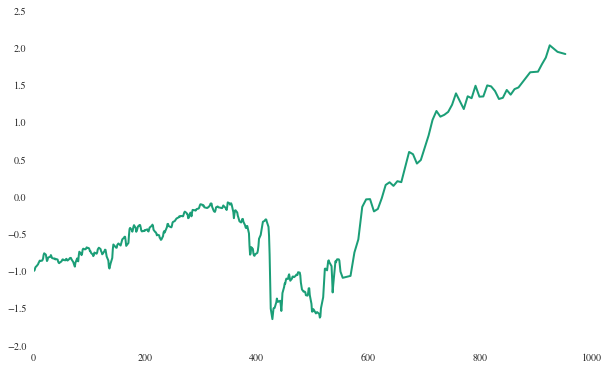

Ten_Day_Moving_Average


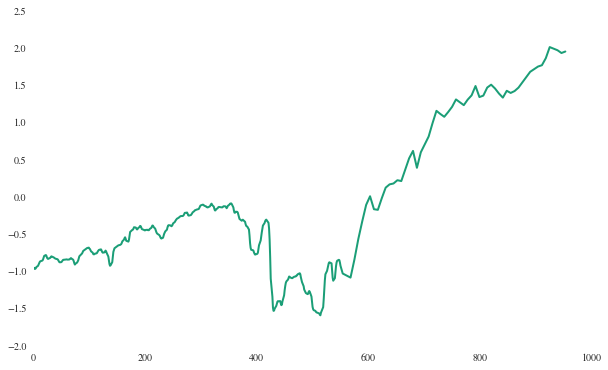

Twenty_Day_Moving_Average


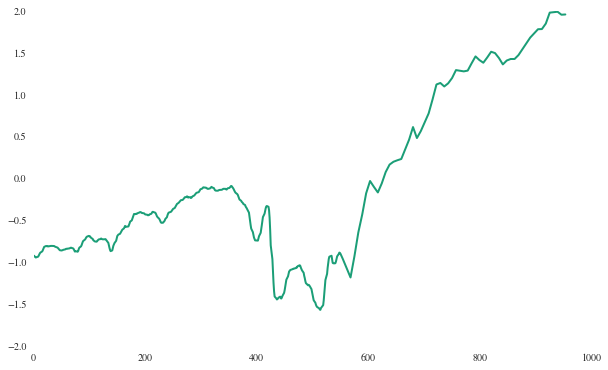

True_Range


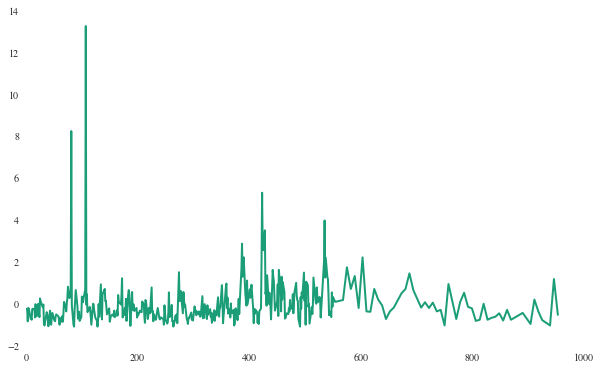

Average_True_Range


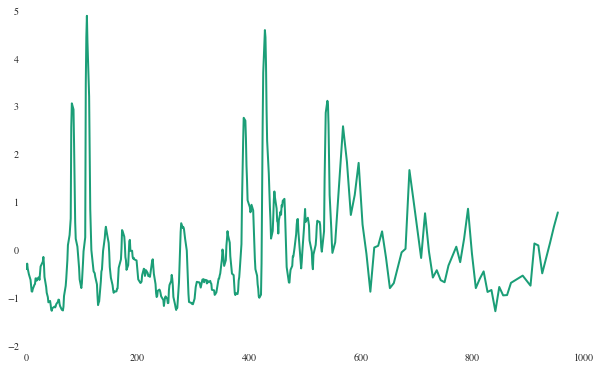

Positive_Directional_Movement


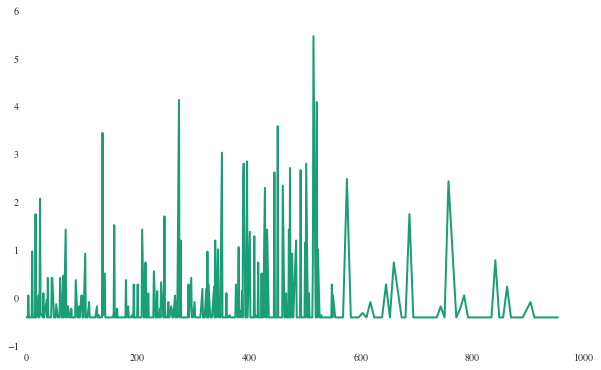

Negative_Directional_Movement


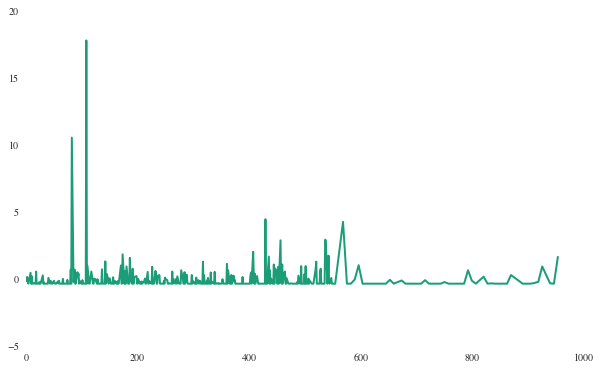

In [128]:
for c in ccc:
    print c
    plt.plot(big['timestamp'], big[c])
    plt.show()

In [89]:
df_one['new'] = df_one['Positive_Directional_Movement'].shift(1)

/Users/Apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [93]:

df_one[df_one['Positive_Directional_Movement']==df_one['new']].shape

(181, 14)

(array([ 302.,   66.,    7.,    2.,    1.,    0.,    1.,    0.,    0.,    1.]),
 array([ -1.06574 ,   0.370471,   1.806682,   3.242893,   4.679104,
          6.115315,   7.551526,   8.987737,  10.423948,  11.860159,
         13.29637 ]),
 <a list of 10 Patch objects>)

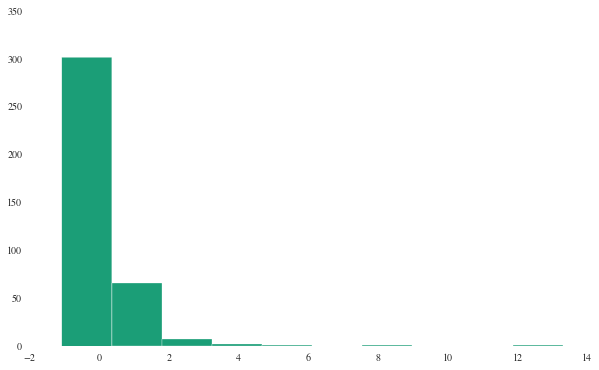

In [98]:
plt.hist(df_one['True_Range'])

In [107]:
df_one[['True_Range','Positive_Directional_Movement','Negative_Directional_Movement','Outcome']]

,True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
0,-0.21129,-0.39903,-0.14321,1
1730,-0.26582,-0.39903,0.16623,1
3461,-0.81122,-0.39903,-0.07181,0
5194,-0.17492,0.06033,-0.33365,1
6929,-0.21128,-0.39903,-0.16702,1
8662,-0.66578,-0.39903,0.47568,0
10397,-0.66578,-0.39903,-0.33365,1
12132,-0.73850,-0.39903,0.23764,0
13867,-0.22946,0.97901,-0.33365,0
15603,-0.21128,-0.39903,-0.33365,1


In [102]:
df_one['Positive_Directional_Movement'].min()

-0.39903

In [104]:
df_one['Negative_Directional_Movement'].min()

-0.33365

In [115]:
test['Outcome'] = np.nan

In [118]:
big = pd.concat([train,test])

In [119]:
big = big[big['Stock_ID']==1]

In [124]:
df_one['True_Range'].sum()

-6.767989999999989

,ID,timestamp,Stock_ID,Volume,Three_Day_Moving_Average,Five_Day_Moving_Average,Ten_Day_Moving_Average,Twenty_Day_Moving_Average,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome,new
0,1_1,1,1,-0.33308,-0.99681,-0.98736,-0.94728,-0.91977,-0.21129,-0.38778,-0.39903,-0.14321,1,NaN
1730,1_2,2,1,-0.44671,-0.97777,-0.97654,-0.96202,-0.92946,-0.26582,-0.27495,-0.39903,0.16623,1,-0.39903
3461,1_3,3,1,-0.46943,-0.94325,-0.94662,-0.96073,-0.93480,-0.81122,-0.38154,-0.39903,-0.07181,0,-0.39903
5194,1_4,4,1,-0.67396,-0.92026,-0.93240,-0.95294,-0.94088,-0.17492,-0.44015,0.06033,-0.33365,1,-0.39903
6929,1_5,5,1,0.43959,-0.94202,-0.92750,-0.93718,-0.93805,-0.21128,-0.49477,-0.39903,-0.16702,1,0.06033
8662,1_8,8,1,-0.03765,-0.88970,-0.89984,-0.92016,-0.93112,-0.66578,-0.61354,-0.39903,0.47568,0,-0.39903
10397,1_9,9,1,-0.33308,-0.87670,-0.88050,-0.90345,-0.92175,-0.66578,-0.72686,-0.39903,-0.33365,1,-0.39903
12132,1_10,10,1,-0.69669,-0.87157,-0.86701,-0.88431,-0.90748,-0.73850,-0.85454,-0.39903,0.23764,0,-0.39903
13867,1_11,11,1,0.03053,-0.84077,-0.85026,-0.86864,-0.89407,-0.22946,-0.86045,0.97901,-0.33365,0,-0.39903
15603,1_12,12,1,-0.44671,-0.85097,-0.85266,-0.85978,-0.88337,-0.21128,-0.80666,-0.39903,-0.33365,1,0.97901


In [129]:
train.groupby('Stock_ID')['Outcome'].mean()

Stock_ID
1       0.489474
2       0.452663
3       0.526316
4       0.178947
6       0.484211
7       0.481481
9       0.295455
10      0.523684
11      0.452632
12      0.486842
13      0.484211
14      0.536842
15      0.394737
16      0.497368
17      0.523684
18      0.465789
19      0.355263
20      0.410526
21      0.384211
22      0.513158
23      0.528947
24      0.413158
25      0.502632
26      0.442105
27      0.489474
28      0.542105
29      0.413158
30      0.510526
31      0.207895
32      0.505263
          ...   
2169    0.375000
2170    0.444737
2171    0.434211
2172    0.478947
2173    0.502632
2174    0.478947
2175    0.384211
2176    0.440625
2177    0.384211
2178    0.463158
2179    0.484211
2180    0.368421
2181    0.481579
2182    0.481579
2183    0.536842
2185    0.542105
2186    0.472313
2187    0.536842
2188    0.378947
2189    0.492105
2190    0.247368
2191    0.497368
2192    0.513158
2193    0.457895
2194    0.452632
2195    0.421053
2196    0.405263
2197 

In [133]:
test['timestamp'].unique()

array([554, 561, 568, 575, 582, 589, 596, 603, 610, 617, 624, 631, 638,
       645, 652, 659, 666, 673, 680, 687, 694, 701, 708, 715, 722, 729,
       736, 743, 750, 757, 764, 771, 778, 785, 792, 799, 806, 813, 820,
       827, 834, 841, 848, 855, 862, 869, 876, 883, 890, 897, 904, 911,
       918, 925, 932, 939, 946, 953])

In [134]:
train

,ID,timestamp,Stock_ID,Volume,Three_Day_Moving_Average,Five_Day_Moving_Average,Ten_Day_Moving_Average,Twenty_Day_Moving_Average,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
0,1_1,1,1,-0.33308,-0.99681,-0.98736,-0.94728,-0.91977,-0.21129,-0.38778,-0.39903,-0.14321,1
1,3_1,1,3,-0.67096,-2.08895,-2.08251,-2.02183,-1.93779,-0.46476,0.97308,-0.31078,0.80286,0
2,4_1,1,4,-0.22040,1.07839,1.09143,1.18737,NaN,-0.51638,-0.52368,-0.24140,-0.31910,0
3,6_1,1,6,-0.23118,-0.55106,-0.53976,-0.47569,-0.42449,-0.60816,-0.69311,-0.40673,-0.45965,0
4,10_1,1,10,0.15076,-1.40937,-1.39805,-1.36756,-1.31365,-0.33206,-0.43690,-0.33347,0.29217,0
5,11_1,1,11,-0.57249,0.61078,0.62465,0.64510,0.76290,1.21998,1.02812,1.44735,-0.40430,1
6,12_1,1,12,0.91950,0.69282,0.69202,0.72082,0.70390,0.05071,-0.79388,-0.43920,-0.47780,0
7,13_1,1,13,0.36579,-0.61906,-0.59099,-0.50427,-0.45347,-0.17573,-0.18656,-0.42729,-0.05086,0
8,14_1,1,14,-0.37675,-1.07755,-1.06405,-1.02723,-0.99213,-0.45472,-0.78394,-0.39440,-0.39275,0
9,15_1,1,15,0.19038,3.73614,3.76318,3.81298,3.82002,1.34630,1.54563,-0.36749,0.18381,0


(array([ 275.,   74.,   19.,    6.,    2.,    1.,    2.,    0.,    0.,    1.]),
 array([-0.83304 ,  0.185067,  1.203174,  2.221281,  3.239388,  4.257495,
         5.275602,  6.293709,  7.311816,  8.329923,  9.34803 ]),
 <a list of 10 Patch objects>)

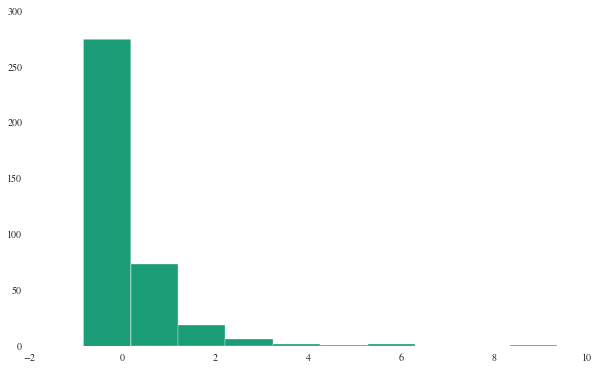

In [136]:
plt.hist(df_one['Volume'])

In [141]:
train[train['Volume']>3]['Outcome'].value_counts()

0    4799
1    4753
Name: Outcome, dtype: int64

In [145]:
df_one[['Three_Day_Moving_Average','Outcome']]

,Three_Day_Moving_Average,Outcome
0,-0.99681,1
1730,-0.97777,1
3461,-0.94325,0
5194,-0.92026,1
6929,-0.94202,1
8662,-0.88970,0
10397,-0.87670,1
12132,-0.87157,0
13867,-0.84077,0
15603,-0.85097,1


In [147]:
test['timestamp'].unique()

array([554, 561, 568, 575, 582, 589, 596, 603, 610, 617, 624, 631, 638,
       645, 652, 659, 666, 673, 680, 687, 694, 701, 708, 715, 722, 729,
       736, 743, 750, 757, 764, 771, 778, 785, 792, 799, 806, 813, 820,
       827, 834, 841, 848, 855, 862, 869, 876, 883, 890, 897, 904, 911,
       918, 925, 932, 939, 946, 953])

In [148]:
train

,ID,timestamp,Stock_ID,Volume,Three_Day_Moving_Average,Five_Day_Moving_Average,Ten_Day_Moving_Average,Twenty_Day_Moving_Average,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
0,1_1,1,1,-0.33308,-0.99681,-0.98736,-0.94728,-0.91977,-0.21129,-0.38778,-0.39903,-0.14321,1
1,3_1,1,3,-0.67096,-2.08895,-2.08251,-2.02183,-1.93779,-0.46476,0.97308,-0.31078,0.80286,0
2,4_1,1,4,-0.22040,1.07839,1.09143,1.18737,NaN,-0.51638,-0.52368,-0.24140,-0.31910,0
3,6_1,1,6,-0.23118,-0.55106,-0.53976,-0.47569,-0.42449,-0.60816,-0.69311,-0.40673,-0.45965,0
4,10_1,1,10,0.15076,-1.40937,-1.39805,-1.36756,-1.31365,-0.33206,-0.43690,-0.33347,0.29217,0
5,11_1,1,11,-0.57249,0.61078,0.62465,0.64510,0.76290,1.21998,1.02812,1.44735,-0.40430,1
6,12_1,1,12,0.91950,0.69282,0.69202,0.72082,0.70390,0.05071,-0.79388,-0.43920,-0.47780,0
7,13_1,1,13,0.36579,-0.61906,-0.59099,-0.50427,-0.45347,-0.17573,-0.18656,-0.42729,-0.05086,0
8,14_1,1,14,-0.37675,-1.07755,-1.06405,-1.02723,-0.99213,-0.45472,-0.78394,-0.39440,-0.39275,0
9,15_1,1,15,0.19038,3.73614,3.76318,3.81298,3.82002,1.34630,1.54563,-0.36749,0.18381,0
